In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("insurance_pre.csv")

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [3]:
dataset = pd.get_dummies(dataset,drop_first=True)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [4]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [6]:
Independent = dataset [['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
dependent = dataset [['charges']]

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(Independent,dependent,train_size=0.70,random_state=0)

In [135]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(criterion ='poisson')
DT.fit(x_train,y_train)

DecisionTreeRegressor(criterion='poisson')

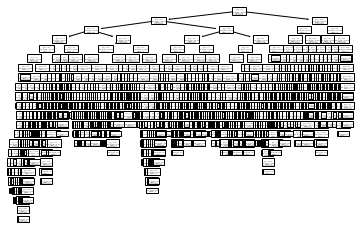

In [119]:
#from sklearn import tree
#import matplotlib.pyplot as plt
#tree.plot_tree(DT)
#plt.show()

In [136]:
y_pred = DT.predict(x_test)

In [137]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
R2

0.6584850569686191